# Snapchat Dataset (Dataset 1) - text/csv MIME Type
## Done by Jai
This Jupyter Notebook is used to format the raw datasets used to create our dataset 1, which illustrates the daily active users (DAUs) of Snapchat, its stock value, and revenues. The code here exists all the way until the visualisations and data analysis.

## Dataset 1 Preprocessing
Dataset(s) used: https://www.statista.com/statistics/552694/snapchat-quarterly-revenue/, https://finance.yahoo.com/quote/SNAP/, https://www.statista.com/statistics/545967/snapchat-app-dau/

In [76]:
import pandas as pd
from datetime import date
import warnings
warnings.filterwarnings('ignore')

The dataset we have is in separate raw .csv files, here we read them in.

In [77]:
# raw dataset filenames
path = "raw_files"
dau_data_filename = "statistic_id545967_daily-active-users-of-snapchat-2014-2022.xlsx"
stock_data_filename = "SNAP_Stock.csv"
revenue_data_filename = "statistic_id552694_snap-worldwide-quarterly-revenue-2015-2022.xlsx"
sheet_name = "Data"

### Formatting Stock Data
The stock data has a few missing values, since it only has the values that occur on the days during which the Stock Market is active. We'll fill these in with the value of the last closing price.

In [78]:
stock_data = pd.read_csv(path + '/' + stock_data_filename)
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,16.620001,16.950001,16.459999,16.780001,16.780001,26062600
1,2020-01-03,16.430000,17.100000,16.350000,16.750000,16.750000,19761500
2,2020-01-06,16.650000,16.790001,16.410000,16.780001,16.780001,15952600
3,2020-01-07,16.870001,17.065001,16.549999,17.030001,17.030001,21146400
4,2020-01-08,16.980000,17.010000,16.650000,16.670000,16.670000,15600900
...,...,...,...,...,...,...,...
751,2022-12-23,8.670000,8.760000,8.505000,8.580000,8.580000,16986000
752,2022-12-27,8.400000,8.690000,8.265000,8.560000,8.560000,26829300
753,2022-12-28,8.440000,8.709000,8.390000,8.550000,8.550000,18172700
754,2022-12-29,8.635000,8.960000,8.530000,8.810000,8.810000,30669900


In [79]:
# Drop other columns
stock_data = stock_data[['Date', 'Close']]

# Fill in the missing values
# 1. Convert the date column to a datetime object
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# 2. Set the date column as the index
stock_data.set_index('Date', inplace=True)

# 3. Create a new DataFrame with all dates from the start date to the end date
date_range = pd.date_range(start=date(2020, 1, 1), end=date(2022, 12, 31))
new_stock_data = pd.DataFrame(index=date_range)

# 4. Join the new DataFrame with the original DataFrame
stock_data = stock_data.join(new_stock_data, how='right')

# 5. Forward fill missing values with the last non-null value
stock_data['Close'].fillna(method='ffill', inplace=True)

# 6. Rename column
stock_data.rename(columns={'Close': 'Snapchat_Closing_Stock_Price'}, inplace=True)

# 7. Get date back
stock_data['Date'] = stock_data.index
stock_data.reset_index(inplace=True)
stock_data = stock_data[['Date', 'Snapchat_Closing_Stock_Price']]

stock_data

,Date,Snapchat_Closing_Stock_Price
0,2020-01-01,NaN
1,2020-01-02,16.780001
2,2020-01-03,16.750000
3,2020-01-04,16.750000
4,2020-01-05,16.750000
...,...,...
1091,2022-12-27,8.560000
1092,2022-12-28,8.550000
1093,2022-12-29,8.810000
1094,2022-12-30,8.950000


We are now done with the preprocessing and formatting of this feature.

### Formatting DAU and Revenue Data
Both of these are quarterly data. We format them and lastly compute them into our main dataset.

In [80]:
# function to format the datasets
def format_dataset(df, col_name):
    df = df.drop(index=range(4))
    df = df.drop(columns=df.columns[0])
    df.columns = ["Quarters", col_name]
    df = df.iloc[-12:, :].reset_index(drop=True)
    return df

In [81]:
# Format DAU Data
dau_data = pd.read_excel(path + '/' + dau_data_filename, sheet_name=sheet_name)
formatted_dau_data = format_dataset(dau_data, "Snapchat_Quarterly_DAUs")

# Format Revenue Data
revenue_data = pd.read_excel(path + '/' + revenue_data_filename, sheet_name=sheet_name)
formatted_revenue_data = format_dataset(revenue_data, "Snapchat_Quarterly_Revenue")

# merging newly formatted datasets
dau_revenue_data = pd.merge(formatted_revenue_data, formatted_dau_data, on='Quarters')

# splitting quarter and year
dau_revenue_data[['Quarter', 'Year']] = dau_revenue_data['Quarters'].str.split(" ", expand=True)
dau_revenue_data['Year'] = "20" + dau_revenue_data['Year'].str.replace("'", "")
dau_revenue_data['Quarter'] = dau_revenue_data['Quarter'].str.replace("Q", "")
dau_revenue_data = dau_revenue_data.drop(columns="Quarters")

dau_revenue_data

,Snapchat_Quarterly_Revenue,Snapchat_Quarterly_DAUs,Quarter,Year
0,462.48,229.0,1,2020
1,454.16,238.0,2,2020
2,678.67,249.0,3,2020
3,911.00,265.0,4,2020
4,770.00,280.0,1,2021
5,982.11,293.0,2,2021
6,1067.47,306.0,3,2021
7,1297.89,319.0,4,2021
8,1062.00,332.0,1,2022
9,1110.00,347.0,2,2022


## Main Dataset Preprocessing
We add a few columns and then merge our features.

In [82]:
main_dataset = pd.read_csv("../Master_Dataset_Raw.csv")
main_dataset

,Story Primary ID,Story ID,User Primary ID,User ID,Gender,Age,Title,Narrative,Media,Account Created Date,Interest
0,156581,STY1666112066,86625,USR1662300553,NaN,12,Qatar Airways cuts flights to accommodate FIFA...,"<p dir=""ltr"">Qatar Airways&#160;has withdrawn ...",https://image.pixstory.com/Pixstory-image-1666...,2022-09-04 19:39:13,"Technology, History, Food, Entertainment, Spor..."
1,156580,STY1666111954,119236,USR1665943314,NaN,18,Positive thinking does not necessarily mean av...,"<p dir=""ltr"">Positive thinking does not necess...",https://image.pixstory.com/Pixstory-image-1666...,2022-10-16 23:31:54,"Technology, History, Food, Entertainment, Spor..."
2,156579,STY1666111923,86566,USR1662294899,NaN,12,FIFA negotiating 'initiatives' for Qatar migra...,"<p dir=""ltr"">FIFA's president sought Monday to...",https://image.pixstory.com/Pixstory-image-1666...,2022-09-04 18:04:59,"Technology, History, Food, Entertainment, Spor..."
3,156578,STY1666111798,86655,USR1662303432,NaN,12,Qatar ready for the World Cup in just over a m...,"<p dir=""ltr"">Ticket sales for the FIFA World C...",https://image.pixstory.com/Pixstory-image-1666...,2022-09-04 20:27:12,"Technology, History, Food, Entertainment, Spor..."
4,156577,STY1666111463,9221,USR1632727815,male,23,"Froyo always makes everyone happy, make this h...","<p dir=""ltr""></p>\n<p dir=""ltr"">Almost all of ...",https://image.pixstory.com/Pixstory-image-1666...,2021-09-27 13:00:15,"Science, Inequality, Education, Technology, He..."
...,...,...,...,...,...,...,...,...,...,...,...
94995,95021,STY1650382324,22770,USR1642425119,male,40,Ronaldo salta la trasferta di Liverpool,Il Manchester United ha annunciato l'assenza d...,https://image.pixstory.com/Pixstory-image-1650...,2022-01-17 18:41:59,"calcio, premier league, cristiano ronaldo, man..."
94996,95020,STY1650381837,32577,USR1650381467,NaN,15,Name-vishal\nFather name-Amod\nClass-7\nAge-13...,Earthday,https://image.pixstory.com/Pixstory-image-1650...,2022-04-19 20:47:47,chintan
94997,95019,STY1650381574,32498,USR1650370047,NaN,15,Earth day,Name Muskan \nClass 8\nSex f,https://image.pixstory.com/Pixstory-image-1650...,2022-04-19 17:37:27,chintan
94998,95018,STY1650380690,32574,USR1650380153,NaN,12,Name-puneet\nclass-6th\nfather name-Ramkishan\...,Earthday,https://image.pixstory.com/Pixstory-image-1650...,2022-04-19 20:25:53,chintan


We have the main dataset, we have to add needed columns

In [83]:
# convert datetime
main_dataset['Account Created Date'] = pd.to_datetime(main_dataset['Account Created Date'])

# Create new columns for year and quarter using the 'Datetime' column
main_dataset['Year'] = main_dataset['Account Created Date'].dt.year
main_dataset['Quarter'] = main_dataset['Account Created Date'].dt.quarter
main_dataset["Year_Quarter"] = main_dataset['Year'].astype(str) + '_' + main_dataset['Quarter'].astype(str)

# open dataset with revenue and DAUs
dau_revenue_data["Year_Quarter"] = dau_revenue_data['Year'].astype(str) + '_' + dau_revenue_data['Quarter'].astype(str)
dau_revenue_data = dau_revenue_data.drop(columns=["Quarter", "Year"])

# merge the 2
merged_df = pd.merge(main_dataset, dau_revenue_data, how='left', on='Year_Quarter')

merged_df

,Story Primary ID,Story ID,User Primary ID,User ID,Gender,Age,Title,Narrative,Media,Account Created Date,Interest,Year,Quarter,Year_Quarter,Snapchat_Quarterly_Revenue,Snapchat_Quarterly_DAUs
0,156581,STY1666112066,86625,USR1662300553,NaN,12,Qatar Airways cuts flights to accommodate FIFA...,"<p dir=""ltr"">Qatar Airways&#160;has withdrawn ...",https://image.pixstory.com/Pixstory-image-1666...,2022-09-04 19:39:13,"Technology, History, Food, Entertainment, Spor...",2022,3,2022_3,1128.48,363.0
1,156580,STY1666111954,119236,USR1665943314,NaN,18,Positive thinking does not necessarily mean av...,"<p dir=""ltr"">Positive thinking does not necess...",https://image.pixstory.com/Pixstory-image-1666...,2022-10-16 23:31:54,"Technology, History, Food, Entertainment, Spor...",2022,4,2022_4,1299.74,377.0
2,156579,STY1666111923,86566,USR1662294899,NaN,12,FIFA negotiating 'initiatives' for Qatar migra...,"<p dir=""ltr"">FIFA's president sought Monday to...",https://image.pixstory.com/Pixstory-image-1666...,2022-09-04 18:04:59,"Technology, History, Food, Entertainment, Spor...",2022,3,2022_3,1128.48,363.0
3,156578,STY1666111798,86655,USR1662303432,NaN,12,Qatar ready for the World Cup in just over a m...,"<p dir=""ltr"">Ticket sales for the FIFA World C...",https://image.pixstory.com/Pixstory-image-1666...,2022-09-04 20:27:12,"Technology, History, Food, Entertainment, Spor...",2022,3,2022_3,1128.48,363.0
4,156577,STY1666111463,9221,USR1632727815,male,23,"Froyo always makes everyone happy, make this h...","<p dir=""ltr""></p>\n<p dir=""ltr"">Almost all of ...",https://image.pixstory.com/Pixstory-image-1666...,2021-09-27 13:00:15,"Science, Inequality, Education, Technology, He...",2021,3,2021_3,1067.47,306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94995,95021,STY1650382324,22770,USR1642425119,male,40,Ronaldo salta la trasferta di Liverpool,Il Manchester United ha annunciato l'assenza d...,https://image.pixstory.com/Pixstory-image-1650...,2022-01-17 18:41:59,"calcio, premier league, cristiano ronaldo, man...",2022,1,2022_1,1062.00,332.0
94996,95020,STY1650381837,32577,USR1650381467,NaN,15,Name-vishal\nFather name-Amod\nClass-7\nAge-13...,Earthday,https://image.pixstory.com/Pixstory-image-1650...,2022-04-19 20:47:47,chintan,2022,2,2022_2,1110.00,347.0
94997,95019,STY1650381574,32498,USR1650370047,NaN,15,Earth day,Name Muskan \nClass 8\nSex f,https://image.pixstory.com/Pixstory-image-1650...,2022-04-19 17:37:27,chintan,2022,2,2022_2,1110.00,347.0
94998,95018,STY1650380690,32574,USR1650380153,NaN,12,Name-puneet\nclass-6th\nfather name-Ramkishan\...,Earthday,https://image.pixstory.com/Pixstory-image-1650...,2022-04-19 20:25:53,chintan,2022,2,2022_2,1110.00,347.0


In [84]:
merged_df['Date'] = merged_df['Account Created Date'].dt.date

merged_df['Date'] = pd.to_datetime(merged_df['Date'])
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

double_merged_df = pd.merge(merged_df, stock_data, how='left', on='Date')
double_merged_df = double_merged_df.drop(['Date', 'Year', 'Quarter'], axis=1)


double_merged_df

,Story Primary ID,Story ID,User Primary ID,User ID,Gender,Age,Title,Narrative,Media,Account Created Date,Interest,Year_Quarter,Snapchat_Quarterly_Revenue,Snapchat_Quarterly_DAUs,Snapchat_Closing_Stock_Price
0,156581,STY1666112066,86625,USR1662300553,NaN,12,Qatar Airways cuts flights to accommodate FIFA...,"<p dir=""ltr"">Qatar Airways&#160;has withdrawn ...",https://image.pixstory.com/Pixstory-image-1666...,2022-09-04 19:39:13,"Technology, History, Food, Entertainment, Spor...",2022_3,1128.48,363.0,11.220000
1,156580,STY1666111954,119236,USR1665943314,NaN,18,Positive thinking does not necessarily mean av...,"<p dir=""ltr"">Positive thinking does not necess...",https://image.pixstory.com/Pixstory-image-1666...,2022-10-16 23:31:54,"Technology, History, Food, Entertainment, Spor...",2022_4,1299.74,377.0,9.990000
2,156579,STY1666111923,86566,USR1662294899,NaN,12,FIFA negotiating 'initiatives' for Qatar migra...,"<p dir=""ltr"">FIFA's president sought Monday to...",https://image.pixstory.com/Pixstory-image-1666...,2022-09-04 18:04:59,"Technology, History, Food, Entertainment, Spor...",2022_3,1128.48,363.0,11.220000
3,156578,STY1666111798,86655,USR1662303432,NaN,12,Qatar ready for the World Cup in just over a m...,"<p dir=""ltr"">Ticket sales for the FIFA World C...",https://image.pixstory.com/Pixstory-image-1666...,2022-09-04 20:27:12,"Technology, History, Food, Entertainment, Spor...",2022_3,1128.48,363.0,11.220000
4,156577,STY1666111463,9221,USR1632727815,male,23,"Froyo always makes everyone happy, make this h...","<p dir=""ltr""></p>\n<p dir=""ltr"">Almost all of ...",https://image.pixstory.com/Pixstory-image-1666...,2021-09-27 13:00:15,"Science, Inequality, Education, Technology, He...",2021_3,1067.47,306.0,80.080002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94995,95021,STY1650382324,22770,USR1642425119,male,40,Ronaldo salta la trasferta di Liverpool,Il Manchester United ha annunciato l'assenza d...,https://image.pixstory.com/Pixstory-image-1650...,2022-01-17 18:41:59,"calcio, premier league, cristiano ronaldo, man...",2022_1,1062.00,332.0,38.040001
94996,95020,STY1650381837,32577,USR1650381467,NaN,15,Name-vishal\nFather name-Amod\nClass-7\nAge-13...,Earthday,https://image.pixstory.com/Pixstory-image-1650...,2022-04-19 20:47:47,chintan,2022_2,1110.00,347.0,33.630001
94997,95019,STY1650381574,32498,USR1650370047,NaN,15,Earth day,Name Muskan \nClass 8\nSex f,https://image.pixstory.com/Pixstory-image-1650...,2022-04-19 17:37:27,chintan,2022_2,1110.00,347.0,33.630001
94998,95018,STY1650380690,32574,USR1650380153,NaN,12,Name-puneet\nclass-6th\nfather name-Ramkishan\...,Earthday,https://image.pixstory.com/Pixstory-image-1650...,2022-04-19 20:25:53,chintan,2022_2,1110.00,347.0,33.630001


We then save our (6) new columns to the main dataset.

In [85]:
double_merged_df.to_csv(f"{path}/Master_Dataset_Raw_V2.csv", index=False)

With that, we are done with our formats and data preprocessing.

## Visualisation 1
We first create DAUs for PixStory to help with our visualisation and analysis

In [86]:
# group the data by 'QUARTER' and count the number of unique values in 'USER_ID' within each group
unique_user_counts = merged_df.groupby('Year_Quarter')['User ID'].nunique()
counts_df = unique_user_counts.to_frame().reset_index()
counts_df.columns = ['Year_Quarter', 'PixStory_DAUs']

merged_df2 = pd.merge(dau_revenue_data, counts_df, how='left', on='Year_Quarter')

merged_df2

,Snapchat_Quarterly_Revenue,Snapchat_Quarterly_DAUs,Year_Quarter,PixStory_DAUs
0,462.48,229.0,2020_1,2.0
1,454.16,238.0,2020_2,NaN
2,678.67,249.0,2020_3,NaN
3,911.00,265.0,2020_4,29.0
4,770.00,280.0,2021_1,84.0
5,982.11,293.0,2021_2,55.0
6,1067.47,306.0,2021_3,81.0
7,1297.89,319.0,2021_4,181.0
8,1062.00,332.0,2022_1,6700.0
9,1110.00,347.0,2022_2,1070.0


We then import visualisation and standardisation tools

In [87]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

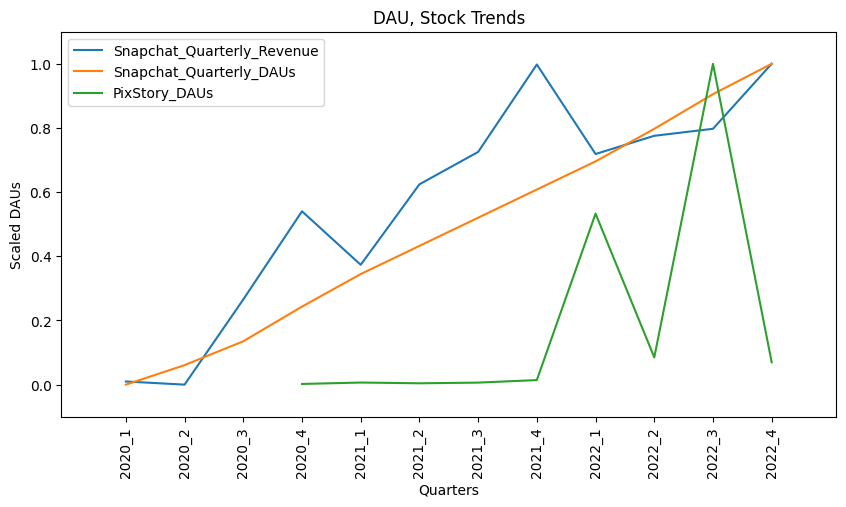

In [88]:
cols_to_scale = ['Snapchat_Quarterly_Revenue', 'Snapchat_Quarterly_DAUs', 'PixStory_DAUs']
scaler = MinMaxScaler()
merged_df2[cols_to_scale] = scaler.fit_transform(merged_df2[cols_to_scale])

fig, ax = plt.subplots()
for col in cols_to_scale:
    ax.plot(merged_df2['Year_Quarter'], merged_df2[col], label=col)


# tidy up and save the figure

ax.legend()
plt.xticks(rotation=90)
plt.xlabel('Quarters')
plt.ylabel('Scaled DAUs')
plt.title('DAU, Stock Trends')

plt.margins(0.1)
plt.gcf().set_size_inches(10, 5)
plt.savefig('visualisation1.png', bbox_inches='tight')


plt.show()

As can be seen from this visualisation, there is not much correlation in the trends of PixStory DAUs and the DAUs of Snapchat, or its revenue collections. While this is not a solid answer to our question, we can interpret this data to say that users generally being online on other social media platforms (Such as Snapchat) do not necessarily translate into users being online on PixStory. An interesting find here is that Snapchat's DAU trends the same as its revenue.

## Visualisation 2
We now visualise daily PixStory posts and Stock value.

In [89]:
post_count_by_date = merged_df.groupby(merged_df['Account Created Date'].dt.date)['Account Created Date'].count()

# Create a date range from 1st Jan 2020 to 31st Dec 2022
dates = pd.date_range(start='2020-01-01', end='2022-12-31')

# Create a DataFrame with the dates and set the index to be the dates
df_post_counts = pd.DataFrame()

# Populate the DataFrame with post counts per date
for date, count in zip(post_count_by_date.index, post_count_by_date.values):
    df_post_counts.loc[date, 'Post_Count'] = count


df_post_counts['Date'] = df_post_counts.index
df_post_counts.reset_index(inplace=True)
df_post_counts = df_post_counts[['Date', 'Post_Count']]

df_post_counts['Date'] = pd.to_datetime(df_post_counts['Date'])
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

merged_df3 = pd.merge(stock_data, df_post_counts, how='left', on='Date')
merged_df3

,Date,Snapchat_Closing_Stock_Price,Post_Count
0,2020-01-01,NaN,NaN
1,2020-01-02,16.780001,NaN
2,2020-01-03,16.750000,NaN
3,2020-01-04,16.750000,NaN
4,2020-01-05,16.750000,NaN
...,...,...,...
1091,2022-12-27,8.560000,NaN
1092,2022-12-28,8.550000,NaN
1093,2022-12-29,8.810000,NaN
1094,2022-12-30,8.950000,NaN


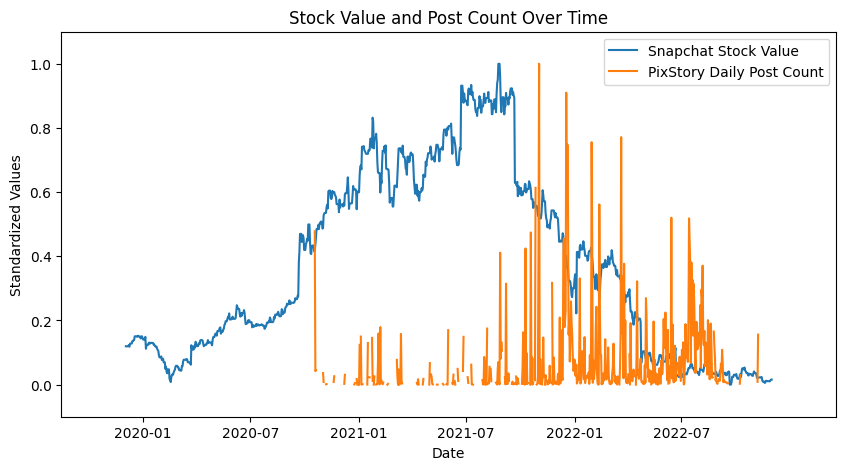

In [90]:
# Standardize the "Stock Value" and "Post Count" columns
scaler2 = MinMaxScaler()
merged_df3[['Snapchat_Closing_Stock_Price', 'Post_Count']] = scaler.fit_transform(merged_df3[['Snapchat_Closing_Stock_Price', 'Post_Count']])

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the "Stock Value" column
ax.plot(merged_df3['Date'], merged_df3['Snapchat_Closing_Stock_Price'], label='Snapchat Stock Value')

# Plot the "Post Count" column
ax.plot(merged_df3['Date'], merged_df3['Post_Count'], label='PixStory Daily Post Count')

# Set the x-axis ticks and labels
xticks = pd.date_range(merged_df3['Date'].iloc[0], merged_df3['Date'].iloc[-1], freq='6M')
xticklabels = [x.strftime('%Y-%m') for x in xticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

# Set the x-axis label
ax.set_xlabel('Date')

# Set the y-axis label
ax.set_ylabel('Standardized Values')

# Set the plot title
ax.set_title('Stock Value and Post Count Over Time')

# Add a legend
ax.legend()

plt.margins(0.1)
plt.gcf().set_size_inches(10, 5)
plt.savefig('visualisation2.png', bbox_inches='tight')

# Show the plot
plt.show()

As can be seen from this visualisation, PixStory's daily post count does not correlate with Snapchat's stock value. This means that the market's perception of social media (such as Snapchat) may not imply increased user engagement on other social media (such as PixStory). Further, we can then say that as the stock price for other social media (Facebook, Snapchat, Twitter) rises, it may not mean much for PixStory.

Finally, with both of these visualisations, we may conclude that PixStory does not generally trend along the same lines as Snapchat.